<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

**References:**
1. Principal Component Analysis (PCA) https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
2. Dimensionality Reduction using PCA on multivariate timeseries data: https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4
3. Principal Components Analysis of a set of stocks price data http://slendermeans.org/ml4h-ch8.html
4. SSA (Singular Spectrum Analysis) versus PCA (Principal Component Analysis)http://karthur.org/2017/learning-for-time-series-ssa-vs-pca.html 

**Principal Component Analysis (PCA)** is a deminsionality reduction technique that uses a coordinate transform.  The objective of PCA is to "provide the best m-dimensional approximation (in terms of Euclidean distance)" [1] to each observation in a p-dimensional dataset, where p>m. PCA essential changes (projects) from the coordinate system represented by the variables in the dataset to a coordinate system with less dimensions (variables). PCA reduces the variables in the origianal data into new variables called "principle components" (PC).  PCs are ordered by the amount of variance that they explain.  PCs are not likely to have real world meaning and can be tricky to understand.  Note that dimension reduction is the standard use of PCA.  It can be used to increase dimensions.

There are three ways to implement basic PCA

1. **Standarized Spectral (Eigenvalue) Decomposition**, which uses the **correlation** matrix of the data.  This is the version often used in signal processing and is also called **Karhunen–Loève (K-L) expansion**.
2. **Unstandardized Spectral Decompositing**, which uses the **covariance** matrix of the data
3. **Singular Value Decomposition**, which just uses the data matrix.  It is a generalization of spectral decomposition.  Note that this is the default PCA method used in scikit learn.

**Methods 2** and **3** above require mean-centering and standardizing the variables prior to performing PCA (Mean = 0 and Variance = 1).  Doing so also makes these two techniques eqivalent.
**Mehtod 1** standardizing occurs during the caluculation of the correlation matrix.

PCA is sensitive to large variables, which is why standardization is required.  If it is not done, large variables can dominate the PCA algorithm.

***Spectral Decomposition:***

"Given a multivariate dataset X as an n×p matrix, where the columns Xi,i∈{1,⋯,p} represent distinct variables and the rows represent different observations or samples of each of the variables, the spectral decomposition (unstandardized) of the covariance matrix can be written as:"

Q<sup>-1</sup>AQ=Λ

*   A is the covariance matrix of X. It is assumed a real, symmetric matrix
*   Q's columns are the orthonormal eigenvectors of A
*   Λ is a diagonal matrix and the non-zero values correspond to the eigenvalues.

*For standard spectral decomposition, A is the correlation matrix of X.

***Singular Value Decomposition***

"Singular value decomposition is a generalization of spectral decomposition. Any m×n matrix X can be factored into a composition of orthogonal matrices, U and V<sup>T</sup>, and a diagonalizable matrix Σ:

X=UΣV<sup>T</sup>

The columns of the m×m matrix U are the eigenvectors of XX<sup>T</sup> while the columns of the n×n matrix V are the eigenvectors of X<sup>T</sup>X. The columns of U and V are also called the "left" and "right" singular vectors. The singular values on the diagonal of Σ are the square-roots of the non-zero eigenvalues of both the XX<sup>T</sup> and X<sup>T</sup>X matrices.

In PCA, the "right singular vectors," the columns of the V matrix, of an SVD are equivalent to the eigenvectors of the covariance matrix. Also, the eigenvalues of the covariance matrix correspond to the variance explained by each respective principal component."


## **Advantages of Principal Component Analysis**
**1. Removes Correlated Features:**

In a real-world scenario, this is very common that you get thousands of features in your dataset. You cannot run your algorithm on all the features as it will reduce the performance of your algorithm and it will not be easy to visualize that many features in any kind of graph. So, you MUST reduce the number of features in your dataset.

You need to find out the correlation among the features (correlated variables). Finding correlation manually in thousands of features is nearly impossible, frustrating and time-consuming. PCA does this for you efficiently.

After implementing the PCA on your dataset, all the Principal Components are independent of one another. There is no correlation among them.

**2. Improves Algorithm Performance:**

With so many features, the performance of your algorithm will drastically degrade. PCA is a very common way to speed up your Machine Learning algorithm by getting rid of correlated variables which don’t contribute in any decision making. The training time of the algorithms reduces significantly with less number of features.

So, if the input dimensions are too high, then using PCA to speed up the algorithm is a reasonable choice.

**3. Reduces Overfitting:** 

Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

**4. Improves Visualization:**

It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data to low dimensional data (2 dimension) so that it can be visualized easily.

We can use 2D Scree Plot to see which Principal Components result in high variance and have more impact as compared to other Principal Components.

Even the simplest IRIS dataset is 4 dimensional which is hard to visualize. We can use PCA to reduce it to 2-dimension for better visualization.

## **Disadvantages of Principal Component Analysis**
**1. Independent variables become less interpretable:**

After implementing PCA on the dataset, your original features will turn into Principal Components. Principal Components are the linear combination of your original features. Principal Components are not as readable and interpretable as original features.

**2. Data standardization is must before PCA:**

You must standardize your data before implementing PCA, otherwise PCA will not be able to find the optimal Principal Components.

For instance, if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.

Also, for standardization, all the categorical features are required to be converted into numerical features before PCA can be applied.

PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler from Scikit Learn to standardize the dataset features onto unit scale (mean = 0 and standard deviation = 1) which is a requirement for the optimal performance of many Machine Learning algorithms.

**3. Information Loss:**

Although Principal Components try to cover maximum variance among the features in a dataset, if we don’t select the number of Principal Components with care, it may miss some information as compared to the original list of features.

</br>

**From:** https://www.i2tutorials.com/what-are-the-pros-and-cons-of-the-pca/


In [ ]:
!pip install sklearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.neighbors import NearestNeighbors
import scipy.io
import pandas as pd
from pathlib import Path

In [ ]:
#Importing and cleaning up data

filepath = "https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/Sensorless_drive_diagnosis.csv"

df = pd.read_csv(filepath, dtype=np.float64)
df_labels = df[df.columns[48]]
labels = df_labels.to_numpy()

# Drop the Label Column
df_data = df.drop(df.columns[48], axis=1)

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_data)

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

pca = PCA(2)  # project from 7 to 2 dimensions
projected = pca.fit_transform(df_normalized)

df_pca = pd.DataFrame(data = projected, columns = ['principal component 1', 'principal component 2'])


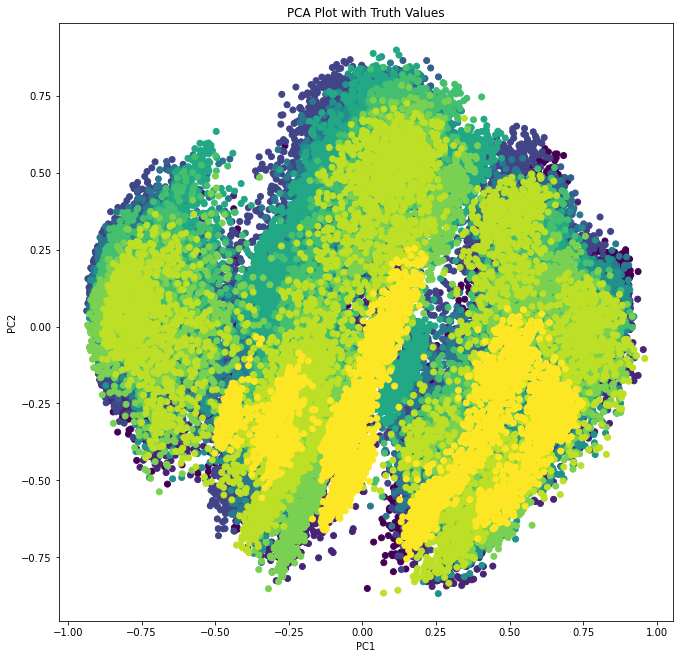

In [ ]:
# Building the label to colour mapping
# Need a number of colors equal to the number of clusters/labels plus one for noise (colours[-1])
colors = {}
colors[0] = 0
colors[1] = 1
colors[2] = 2
colors[3] = 3
colors[4] = 4
colors[5] = 5
colors[6] = 6
colors[7] = 7
colors[8] = 8
colors[9] = 9
colors[10] = 10
colors[11] = 11
colors[12] = 12
colors[-1] = 'k'
  
# Building the color vector for each data point
cvec = [colors[label] for label in labels]
  
# Plotting Time on the x-axis, P1 on the y-Axis,  and P2 on the z-Axis 
# according to the color vector defined
plt.figure(figsize = (11, 11))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'], c=cvec)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title("PCA Plot with Truth Values")


  
plt.show()